In [3]:
from  urllib.request import urlopen
import xml.etree.ElementTree as ET
import zipfile
import io
import os, sys
import pandas as pd


#모든 행과 열을 출력합니다.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#출력되는 행과 열의 수를 제한합니다.
# pd.options.display.max_rows = 60
# pd.options.display.max_columns = 20

In [4]:
# api key가 저장된 디렉토리
sys.path.append("c:\\KhAPI\\Python\\toy\\dart\\tool")
import API_KEY

API_KEY.key2

'a27a4e6bf5d8701810d49839d64922a438b03918'

In [5]:
class DartReq:
    def __init__(self,dart_api_key):
        self.api_key = dart_api_key
        
    # CORPCODE.xml을 다운로드 합니다.
    def down_corp_codeXML(self, saveXmlDir):
        url = "https://opendart.fss.or.kr/api/corpCode.xml?crtfc_key="
        with urlopen(url+self.api_key) as zipresp:
            with io.BytesIO(zipresp.read()) as ioB:
                with zipfile.ZipFile(ioB) as zip:
                    zip.extractall(saveXmlDir)
                    
    # xml파일을 파싱한 결과를 반환합니다.
    def parse_corp_code(self, saveXmlDir):
        corp_code = []
        stock_code = []
        corp_name = []

        #다운받은 xml파일을 불러옵니다.
        xml_file = f"{saveXmlDir}\CORPCODE.xml"
        print(xml_file)
        doc = ET.parse(xml_file).getroot()
        list_tg = doc.findall("list")

        # corp_code, stock_code, corp_name 각 배열에 항목을 추가합니다.
        for i in list_tg:
            

            # stock_code가 빈 항목이 존재하기 때문에 임의로 지정했습니다.
            if i.find("stock_code").text == " ":
                continue
            else:
                corp_code.append(i.find("corp_code").text)
                corp_name.append(i.find("corp_name").text)
                stock_code.append(i.find("stock_code").text)

        res = {"corp_code": corp_code, "stock_code": stock_code, "corp_name": corp_name}
        return res  



In [6]:
API_KEY.key2

'a27a4e6bf5d8701810d49839d64922a438b03918'

In [7]:
saveXmlDir = "c:\KhAPI\data\dart\corpcode";

In [8]:
saveXmlDir = "c:\KhAPI\data\dart\corpcode";
print("회사코드 저장 경로: ", saveXmlDir)

doDar = DartReq(API_KEY.key)
doDar.down_corp_codeXML(saveXmlDir)
 

회사코드 저장 경로:  c:\KhAPI\data\dart\corpcode


In [9]:
# parse_corp_code 함수 호출
corp_info = doDar.parse_corp_code(saveXmlDir)

p1 = pd.DataFrame(corp_info)

# 마지막 번호 999980	99999999	금감원(테스트)
# p1 = p1.set_index('corp_code').sort_index()

c:\KhAPI\data\dart\corpcode\CORPCODE.xml


In [10]:
p1.set_index("corp_code")

,stock_code,corp_name
corp_code,,
00260985,036720,한빛네트
00264529,040130,엔플렉스
00358545,055000,동서정보기술
00231567,032600,애드모바일
00247939,037600,씨모스
00359614,056140,리더컴
00153551,012400,허메스홀딩스
00344746,045880,유티엑스
00261188,037830,글로포스트


In [11]:
p50 = []
for a in p1["corp_code"]:
    p50.append(int(a))

In [12]:
p50.reverse()


In [13]:

p50

[985686,
 141626,
 361594,
 567222,
 442455,
 585538,
 1329957,
 490090,
 304401,
 150439,
 121686,
 1021949,
 1466832,
 1413371,
 1337017,
 117212,
 217947,
 363927,
 612489,
 131780,
 619640,
 430089,
 124027,
 1267550,
 404701,
 963000,
 261285,
 366942,
 828497,
 280688,
 1497869,
 796994,
 117276,
 116824,
 1363924,
 136721,
 199252,
 1480568,
 1344336,
 150536,
 129235,
 155452,
 136095,
 191472,
 186717,
 353610,
 1325979,
 210980,
 351995,
 255433,
 170877,
 554024,
 795135,
 1601286,
 164645,
 154462,
 108913,
 664288,
 133089,
 1023822,
 1316245,
 683007,
 372873,
 104698,
 1051092,
 1011438,
 366517,
 645089,
 199988,
 760971,
 1032486,
 1316227,
 875307,
 1031502,
 217743,
 172945,
 1046203,
 1393721,
 1181807,
 122551,
 478900,
 219486,
 173078,
 1336373,
 867973,
 905316,
 1205709,
 876166,
 663669,
 204208,
 574611,
 115676,
 367844,
 160302,
 1067516,
 110060,
 892526,
 157104,
 159193,
 666329,
 1152470,
 1034730,
 390903,
 927558,
 681373,
 400060,
 138321,
 990165,
 

In [14]:
#CFS:연결재무제표, OFS:재무제표
fs_div = "CFS"
bsns_year = 2021
crtfc_key = API_KEY.key
corp_code = '00126380'

In [15]:
# CFS:연결재무제표, OFS:재무제표
fs_div = "CFS"
bsns_year = 2021
crtfc_key = API_KEY.key2

# 1분기보고서 : 11013
# 반기보고서 : 11012
# 3분기보고서 : 11014
# 사업보고서 : 11011
reprt_code = 11013

# 단일회사 전체 재무제표 개발가이드
url = "https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml"

def okCheck(num):
    message = {"000": "정상", "010": "등록되지 않은 키입니다.",
     "011": "사용할 수 없는 키입니다. 오픈API에 등록되었으나, 일시적으로 사용 중지된 키를 통하여 검색하는 경우 발생합니다.",
     "012": "접근할 수 없는 IP입니다.", "013": "조회된 데이타가 없습니다.",
     "014": "파일이 존재하지 않습니다.", "020": "요청 제한을 초과하였습니다.\n일반적으로는 10,000건 이상의 요청에 대하여 이 에러 메시지가 발생되나, 요청 제한이 다르게 설정된 경우에는 이에 준하여 발생됩니다.",
     "100": "필드의 부적절한 값입니다. 필드 설명에 없는 값을 사용한 경우에 발생하는 메시지입니다.", "": "",
     "101": "부적절한 접근입니다.", "800": "시스템 점검으로 인한 서비스가 중지 중입니다.",
     "900": "정의되지 않은 오류가 발생하였습니다.", "901": "사용자 계정의 개인정보 보유기간이 만료되어 사용할 수 없는 키입니다. 관리자 이메일(opendart@fss.or.kr)로 문의하시기 바랍니다."}
    if num == "000":
        return 1
    print(message[num])
    return None


#매출채퀀회전율 = 매출액/매출채권(높을수록)
list__accountsReceivablesTurnover = []
#매입채무회전율 = 매출원가 / 매입채무(낮을수록)
list__payableTurnover = []
#재고자산회전율 = 매출원가 /재고자산(높을수록, 가중치 낮춤)
list__inventoryTurnover = []
#현금순환주기 = 재고자산회전기간+매출체권회전기간-매입채무지급기간 #365/회전율 (낮을수록)
list__cashConversionCycle = []
#매출액대비영업활동형금흐름비율 = 영업활동현금흐름/매출액(높을수록)
list__ratioCFfromOfromRevenue = []
#자산대비영업활동현금흐름비율 = 영업활동현금흐름/(자본+부채)  (높을수록)
list__ratioCFfromOfromAsset = []
list_all=[]
all_statements = []

In [16]:
p50.index(220181)

3190

In [18]:

for corp_code in p50[:1178]:
    reqStr = f"{url}?crtfc_key={crtfc_key}&corp_code={f'{corp_code:08d}'}&reprt_code={reprt_code}&bsns_year={bsns_year}&fs_div={fs_div}"
    print(bsns_year, reqStr,end="\n")

    with urlopen(reqStr) as respon:
        doc = ET.parse(respon).getroot()
        if 1 == okCheck(doc.find("status").text):

            name_list = ["재고자산","영업활동현금흐름","매출채권","매출원가","부채총계","자본총계","매출액","매입채무","아무것도없어요"]
            # 응답 결과 중에서 파싱
            list_tg = doc.findall("list")

            # 이번 분기
            # 해당 보고서가 몇기인지
            thstrm_nm= list_tg[0].find("thstrm_nm").text

            
            inventory=0
            totalEquity=0
            CofGS=0
            totalDebt=0
            CFfromO=0
            accountReceivable=0
            accountPayables=0
            revenue=0
            
            for element in list_tg:
                
                 #필요한 계정과목 파싱 완료를 의미 반복 종료
                if len(name_list) == 1:
                    all_statements.append({"corp_code":corp_code, "inventory":inventory, "totalEquity":totalEquity, "CofGS":CofGS,"totalDebt":totalDebt,"CFfromO":CFfromO,"accountReceivable":accountReceivable,"accountPayables":accountPayables,"revenue":revenue})
                    print("all right")
                    break
                    
                thstrm_amount = element.find("thstrm_amount").text
                am_name = element.find("account_nm").text
                am_name = am_name.replace(" ", "")
                
                if am_name.find("(") > -1:
                    left = am_name.find("(")
                    am_name = am_name[:left]

                if thstrm_amount == None:
                    continue
                
#                 print(am_name,":",thstrm_amount,"\t\n inventory",inventory, "totalEquity",totalEquity, "CofGS",CofGS, "totalDebt",totalDebt, "CFfromO",CFfromO, "accountReceivable",accountReceivable, "accountPayables",accountPayables, "revenue",revenue)
                list_all.append({"corp_code":corp_code, "am_name":am_name,"thstrm_amount":thstrm_amount})

#                 print("\t",name_list)
                
                if am_name in name_list:
#                     print("$$$$",am_name)
                    if am_name =="재고자산":
                        name_list.remove("재고자산")
#                         print("재고자산","ok",thstrm_amount)
                        inventory = int(thstrm_amount)

                    elif am_name =="자본총계":
                        name_list.remove("자본총계")
#                         print("자본총계","ok",thstrm_amount)
                        totalEquity= int(thstrm_amount)

                    elif am_name == "매출원가":
                        name_list.remove("매출원가")
#                         print("매출원가","ok",thstrm_amount)
                        CofGS = int(thstrm_amount)

                    elif am_name == "부채총계":
                        name_list.remove("부채총계")
#                         print("부채총계","ok",thstrm_amount)
                        totalDebt= int(thstrm_amount)

                    elif am_name == "영업활동현금흐름":
                        name_list.remove("영업활동현금흐름")
#                         print("영업활동현금흐름","ok",thstrm_amount)
                        CFfromO= int(thstrm_amount)

                    elif am_name == "매출채권":
                        name_list.remove("매출채권")
#                         print("매출채권","ok",thstrm_amount)
                        accountReceivable= int(thstrm_amount)
                        
                    elif am_name == "매입채무":
                        name_list.remove("매입채무")
#                         print("매입채무","ok",thstrm_amount)
                        accountPayables = int(thstrm_amount)
                        
                    else:
                        name_list.remove("매출액")
#                         print("매출액","ok",thstrm_amount)
                        #매출액
                        revenue = int(thstrm_amount)


            if inventory == 0:
#                 print("###inventory",corp_code)
                continue
            elif totalEquity ==0:
#                 print("###totalEquity",corp_code)
                continue
            elif CofGS == 0:
#                 print("###CofGS",corp_code)
                continue
            elif totalDebt == 0:
#                 print("###totalDebt",corp_code)
                continue
            elif CFfromO == 0:
#                 print("###CFfromO",corp_code)
                continue
            elif accountReceivable == 0:
#                 print("###accountReceivable",corp_code)
                continue
            elif accountPayables == 0:
#                 print("###accountPayables",corp_code)
                continue
            elif revenue == 0:
#                 print("###revenue",corp_code)
                continue


#             print("put",inventory, totalEquity, CofGS, totalDebt, CFfromO, accountReceivable, accountPayables, revenue)
            #매출채퀀회전율 = 매출액/매출채권(높을수록)
            accountsReceivablesTurnover = revenue/accountReceivable
            print(accountsReceivablesTurnover)
            #매입채무회전율 = 매춸원가 / 매입채무(낮을수록)
            payableTurnover = CofGS/accountPayables
            print(payableTurnover)
            #재고자산회전율 = 매출원가 /재고자산(높을수록, 가중치 낮춤)
            inventoryTurnover = CofGS/inventory
            print(inventoryTurnover)
            #현금순환주기 = 재고자산회전기간+매출체권회전기간-매입채무지급기간 #365/회전율
            cashConversionCycle = inventoryTurnover + accountsReceivablesTurnover - payableTurnover
            print(cashConversionCycle)
            #매출액대비영업활동형금흐름비율 = 영업활동현금흐름/매출액
            ratioCFfromOfromRevenue = CFfromO/revenue
            print(ratioCFfromOfromRevenue)
            #자산대비영업활동현금흐름비율 = 영업활동현금흐름/(자본+부채)  
            ratioCFfromOfromAsset = CFfromO/(totalEquity+totalDebt)
            print(ratioCFfromOfromAsset)

            list__accountsReceivablesTurnover.append({"corp_code":corp_code,"accountsReceivablesTurnover":accountsReceivablesTurnover,"thstrm_nm":thstrm_nm})
            list__payableTurnover.append({"corp_code":corp_code,"payableTurnover":payableTurnover,"thstrm_nm":thstrm_nm})
            list__inventoryTurnover.append({"corp_code":corp_code,"inventoryTurnover":inventoryTurnover,"thstrm_nm":thstrm_nm})
            list__cashConversionCycle.append({"corp_code":corp_code,"cashConversionCycle":cashConversionCycle,"thstrm_nm":thstrm_nm})
            list__ratioCFfromOfromRevenue.append({"corp_code":corp_code,"ratioCFfromOfromRevenue":ratioCFfromOfromRevenue,"thstrm_nm":thstrm_nm})
            list__ratioCFfromOfromAsset.append({"corp_code":corp_code,"ratioCFfromOfromAsset":ratioCFfromOfromAsset,"thstrm_nm":thstrm_nm})


            print("######\n\n")




2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00985686&reprt_code=11013&bsns_year=2021&fs_div=CFS
all right
2.2655000609018683
2.649934975210593
3.926789705583075
3.5423547912743505
0.021514641007837204
0.005856796425461185
######


2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00141626&reprt_code=11013&bsns_year=2021&fs_div=CFS
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00361594&reprt_code=11013&bsns_year=2021&fs_div=CFS
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00567222&reprt_code=11013&bsns_year=2021&fs_div=CFS
all right
1.6099470065271437
2.75321962374004
0.6702885622935312
-0.47298405491936535
0.04988256033202315
0.006606537105644558
######


2021 https://opendart.fss.or.kr/api/fnlttSing

조회된 데이타가 없습니다.
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00191472&reprt_code=11013&bsns_year=2021&fs_div=CFS
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00186717&reprt_code=11013&bsns_year=2021&fs_div=CFS
all right
2.3801519546692833
1.8422211168624025
3.8601649569030743
4.398095794709954
0.14683162745216832
0.026274092272357264
######


2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00353610&reprt_code=11013&bsns_year=2021&fs_div=CFS
all right
3.9824364466641016
25.848907309589276
16.198565285446467
-5.667905577478706
-0.07266469633171245
-0.020405692580772152
######


2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=01325979&reprt_code=11013&bsns_year=2021&fs_div=CFS
조회된 데이타가 없습니다.
2021 https://

2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00876166&reprt_code=11013&bsns_year=2021&fs_div=CFS
조회된 데이타가 없습니다.
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00663669&reprt_code=11013&bsns_year=2021&fs_div=CFS
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00204208&reprt_code=11013&bsns_year=2021&fs_div=CFS
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00574611&reprt_code=11013&bsns_year=2021&fs_div=CFS
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00115676&reprt_code=11013&bsns_year=2021&fs_div=CFS
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00367844&re

2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=01591262&reprt_code=11013&bsns_year=2021&fs_div=CFS
조회된 데이타가 없습니다.
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00129411&reprt_code=11013&bsns_year=2021&fs_div=CFS
조회된 데이타가 없습니다.
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00120872&reprt_code=11013&bsns_year=2021&fs_div=CFS
조회된 데이타가 없습니다.
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=01180118&reprt_code=11013&bsns_year=2021&fs_div=CFS
조회된 데이타가 없습니다.
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00939331&reprt_code=11013&bsns_year=2021&fs_div=CFS
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d870181

2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00350312&reprt_code=11013&bsns_year=2021&fs_div=CFS
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00501970&reprt_code=11013&bsns_year=2021&fs_div=CFS
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00299002&reprt_code=11013&bsns_year=2021&fs_div=CFS
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00412348&reprt_code=11013&bsns_year=2021&fs_div=CFS
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00173874&reprt_code=11013&bsns_year=2021&fs_div=CFS
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00364306&reprt_code=11013&

조회된 데이타가 없습니다.
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00307222&reprt_code=11013&bsns_year=2021&fs_div=CFS
조회된 데이타가 없습니다.
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00131197&reprt_code=11013&bsns_year=2021&fs_div=CFS
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00406392&reprt_code=11013&bsns_year=2021&fs_div=CFS
조회된 데이타가 없습니다.
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=01136348&reprt_code=11013&bsns_year=2021&fs_div=CFS
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00659161&reprt_code=11013&bsns_year=2021&fs_div=CFS
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a4

조회된 데이타가 없습니다.
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00533191&reprt_code=11013&bsns_year=2021&fs_div=CFS
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00878517&reprt_code=11013&bsns_year=2021&fs_div=CFS
조회된 데이타가 없습니다.
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00246417&reprt_code=11013&bsns_year=2021&fs_div=CFS
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=01301623&reprt_code=11013&bsns_year=2021&fs_div=CFS
조회된 데이타가 없습니다.
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00255275&reprt_code=11013&bsns_year=2021&fs_div=CFS
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a4

조회된 데이타가 없습니다.
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00561866&reprt_code=11013&bsns_year=2021&fs_div=CFS
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=01596656&reprt_code=11013&bsns_year=2021&fs_div=CFS
조회된 데이타가 없습니다.
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00105138&reprt_code=11013&bsns_year=2021&fs_div=CFS
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00107987&reprt_code=11013&bsns_year=2021&fs_div=CFS
조회된 데이타가 없습니다.
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00923826&reprt_code=11013&bsns_year=2021&fs_div=CFS
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a4

2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00159209&reprt_code=11013&bsns_year=2021&fs_div=CFS
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=01328170&reprt_code=11013&bsns_year=2021&fs_div=CFS
조회된 데이타가 없습니다.
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00352718&reprt_code=11013&bsns_year=2021&fs_div=CFS
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00111458&reprt_code=11013&bsns_year=2021&fs_div=CFS
조회된 데이타가 없습니다.
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00230036&reprt_code=11013&bsns_year=2021&fs_div=CFS
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_c

2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=01408999&reprt_code=11013&bsns_year=2021&fs_div=CFS
조회된 데이타가 없습니다.
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=01183407&reprt_code=11013&bsns_year=2021&fs_div=CFS
조회된 데이타가 없습니다.
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00347877&reprt_code=11013&bsns_year=2021&fs_div=CFS
조회된 데이타가 없습니다.
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00563545&reprt_code=11013&bsns_year=2021&fs_div=CFS
조회된 데이타가 없습니다.
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00378363&reprt_code=11013&bsns_year=2021&fs_div=CFS
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d870181

all right
2.859295628503302
16.852375852331114
0.8856596024497768
-13.107420621378036
0.06030684778746015
0.0174285585791782
######


2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=01613281&reprt_code=11013&bsns_year=2021&fs_div=CFS
조회된 데이타가 없습니다.
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00945457&reprt_code=11013&bsns_year=2021&fs_div=CFS
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00255105&reprt_code=11013&bsns_year=2021&fs_div=CFS
조회된 데이타가 없습니다.
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00116949&reprt_code=11013&bsns_year=2021&fs_div=CFS
all right
1.4560785517971113
2.029120089819952
1.44316666577198
0.8701251277491391
-0.01771896339222096
-0.00423570420700767
######


2021 https://opend

조회된 데이타가 없습니다.
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00623661&reprt_code=11013&bsns_year=2021&fs_div=CFS
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=01018617&reprt_code=11013&bsns_year=2021&fs_div=CFS
조회된 데이타가 없습니다.
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00577016&reprt_code=11013&bsns_year=2021&fs_div=CFS
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00545929&reprt_code=11013&bsns_year=2021&fs_div=CFS
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00531917&reprt_code=11013&bsns_year=2021&fs_div=CFS
all right
2.0054739071430365
1.9443930308875095
0.38432484204966644
0.4454057183051934
-0.09701086689627383
-0.0083

2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00149947&reprt_code=11013&bsns_year=2021&fs_div=CFS
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00220969&reprt_code=11013&bsns_year=2021&fs_div=CFS
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00145446&reprt_code=11013&bsns_year=2021&fs_div=CFS
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00200910&reprt_code=11013&bsns_year=2021&fs_div=CFS
all right
1.9318750352249563
4.960719537584385
1.3397482808046686
-1.6890962215547605
0.08988602621587335
0.014533139867615952
######


2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00175173&reprt_code=11013&bsns_year=2021&fs_div=CFS
2021 http

조회된 데이타가 없습니다.
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00458562&reprt_code=11013&bsns_year=2021&fs_div=CFS
all right
2.8387088933022646
2.3922207687621317
3.788850579132553
4.235338703672687
0.13265835599247688
0.02158466185529695
######


2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00128546&reprt_code=11013&bsns_year=2021&fs_div=CFS
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00125743&reprt_code=11013&bsns_year=2021&fs_div=CFS
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00101549&reprt_code=11013&bsns_year=2021&fs_div=CFS
all right
2.9773655273305337
4.188920946281373
0.5088292193980599
-0.7027261995527789
0.11338863805549679
0.014985892513653822
######


2021 https://opendart.fss.or.kr/

2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00475718&reprt_code=11013&bsns_year=2021&fs_div=CFS
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00929228&reprt_code=11013&bsns_year=2021&fs_div=CFS
조회된 데이타가 없습니다.
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00471068&reprt_code=11013&bsns_year=2021&fs_div=CFS
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00756163&reprt_code=11013&bsns_year=2021&fs_div=CFS
조회된 데이타가 없습니다.
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00447575&reprt_code=11013&bsns_year=2021&fs_div=CFS
all right
1.5506233093667312
1.384684542898321
2.3968492257136513
2.5627879921820615
0.5189300834639857
0.066501412

2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00133876&reprt_code=11013&bsns_year=2021&fs_div=CFS
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00235147&reprt_code=11013&bsns_year=2021&fs_div=CFS
조회된 데이타가 없습니다.
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00205687&reprt_code=11013&bsns_year=2021&fs_div=CFS
조회된 데이타가 없습니다.
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00164618&reprt_code=11013&bsns_year=2021&fs_div=CFS
조회된 데이타가 없습니다.
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=01144028&reprt_code=11013&bsns_year=2021&fs_div=CFS
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a4

2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00158963&reprt_code=11013&bsns_year=2021&fs_div=CFS
조회된 데이타가 없습니다.
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00155498&reprt_code=11013&bsns_year=2021&fs_div=CFS
조회된 데이타가 없습니다.
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=01513440&reprt_code=11013&bsns_year=2021&fs_div=CFS
조회된 데이타가 없습니다.
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=01112700&reprt_code=11013&bsns_year=2021&fs_div=CFS
조회된 데이타가 없습니다.
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=01515323&reprt_code=11013&bsns_year=2021&fs_div=CFS
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d870181

2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=01085442&reprt_code=11013&bsns_year=2021&fs_div=CFS
조회된 데이타가 없습니다.
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00914040&reprt_code=11013&bsns_year=2021&fs_div=CFS
조회된 데이타가 없습니다.
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00631837&reprt_code=11013&bsns_year=2021&fs_div=CFS
조회된 데이타가 없습니다.
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00126371&reprt_code=11013&bsns_year=2021&fs_div=CFS
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00125530&reprt_code=11013&bsns_year=2021&fs_div=CFS
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a4

조회된 데이타가 없습니다.
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=01258428&reprt_code=11013&bsns_year=2021&fs_div=CFS
조회된 데이타가 없습니다.
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00983271&reprt_code=11013&bsns_year=2021&fs_div=CFS
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00132354&reprt_code=11013&bsns_year=2021&fs_div=CFS
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=01174038&reprt_code=11013&bsns_year=2021&fs_div=CFS
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=01353848&reprt_code=11013&bsns_year=2021&fs_div=CFS
조회된 데이타가 없습니다.
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a4

2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00523176&reprt_code=11013&bsns_year=2021&fs_div=CFS
조회된 데이타가 없습니다.
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00140061&reprt_code=11013&bsns_year=2021&fs_div=CFS
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00123648&reprt_code=11013&bsns_year=2021&fs_div=CFS
조회된 데이타가 없습니다.
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=01235296&reprt_code=11013&bsns_year=2021&fs_div=CFS
조회된 데이타가 없습니다.
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00149293&reprt_code=11013&bsns_year=2021&fs_div=CFS
조회된 데이타가 없습니다.
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d870181

조회된 데이타가 없습니다.
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00576798&reprt_code=11013&bsns_year=2021&fs_div=CFS
all right
2.3122314186905397
7.682200938703769
0.21910042420570372
-5.150869095807526
-0.0788800425689681
-0.007803774359137817
######


2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=01099667&reprt_code=11013&bsns_year=2021&fs_div=CFS
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00365624&reprt_code=11013&bsns_year=2021&fs_div=CFS
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=01199727&reprt_code=11013&bsns_year=2021&fs_div=CFS
조회된 데이타가 없습니다.
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=01419384&reprt_code=11013&bsns

조회된 데이타가 없습니다.
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00146232&reprt_code=11013&bsns_year=2021&fs_div=CFS
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00238199&reprt_code=11013&bsns_year=2021&fs_div=CFS
조회된 데이타가 없습니다.
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00408266&reprt_code=11013&bsns_year=2021&fs_div=CFS
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00110750&reprt_code=11013&bsns_year=2021&fs_div=CFS
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00130383&reprt_code=11013&bsns_year=2021&fs_div=CFS
all right
4.39825462554779
9.080652874474366
30.30957510737241
25.627176858445836
0.12364844593469636
0.00123443751

2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=01051065&reprt_code=11013&bsns_year=2021&fs_div=CFS
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=01076550&reprt_code=11013&bsns_year=2021&fs_div=CFS
조회된 데이타가 없습니다.
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00183215&reprt_code=11013&bsns_year=2021&fs_div=CFS
조회된 데이타가 없습니다.
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=01582228&reprt_code=11013&bsns_year=2021&fs_div=CFS
조회된 데이타가 없습니다.
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=01414361&reprt_code=11013&bsns_year=2021&fs_div=CFS
조회된 데이타가 없습니다.
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d870181

2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00109514&reprt_code=11013&bsns_year=2021&fs_div=CFS
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00136864&reprt_code=11013&bsns_year=2021&fs_div=CFS
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00605522&reprt_code=11013&bsns_year=2021&fs_div=CFS
조회된 데이타가 없습니다.
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=01528530&reprt_code=11013&bsns_year=2021&fs_div=CFS
조회된 데이타가 없습니다.
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00117498&reprt_code=11013&bsns_year=2021&fs_div=CFS
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_c

조회된 데이타가 없습니다.
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00216027&reprt_code=11013&bsns_year=2021&fs_div=CFS
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=01108248&reprt_code=11013&bsns_year=2021&fs_div=CFS
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=01215618&reprt_code=11013&bsns_year=2021&fs_div=CFS
조회된 데이타가 없습니다.
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00162063&reprt_code=11013&bsns_year=2021&fs_div=CFS
all right
6.395122946832851
-4.92998939816406
1.0667944842159816
12.391906829212893
-0.16463862709757135
-0.023456901711043008
######


2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00371485&reprt_code=11013&bsns_

all right
-24.321865762132852
34.27260211579334
3.5251268359189263
-55.06934104200727
-0.004385117160808091
-0.0004883767095285814
######


2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00527491&reprt_code=11013&bsns_year=2021&fs_div=CFS
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00149770&reprt_code=11013&bsns_year=2021&fs_div=CFS
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=01014718&reprt_code=11013&bsns_year=2021&fs_div=CFS
조회된 데이타가 없습니다.
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00540447&reprt_code=11013&bsns_year=2021&fs_div=CFS
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00239639&reprt_code=11013&bsns_year=2021&f

조회된 데이타가 없습니다.
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=01309795&reprt_code=11013&bsns_year=2021&fs_div=CFS
조회된 데이타가 없습니다.
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00122694&reprt_code=11013&bsns_year=2021&fs_div=CFS
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00493185&reprt_code=11013&bsns_year=2021&fs_div=CFS
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00527464&reprt_code=11013&bsns_year=2021&fs_div=CFS
2021 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.xml?crtfc_key=a27a4e6bf5d8701810d49839d64922a438b03918&corp_code=00488989&reprt_code=11013&bsns_year=2021&fs_div=CFS
all right
2.284133687471678
1.2476369938217304
2.7496374395744465
3.786134133224394
0.16717562609383393
0.068709401

In [48]:
pd.DataFrame(all_statements).to_csv('statements.csv', sep=",",index = False)

In [23]:
#매출채퀀회전율 = 매출액/매출채권(높을수록)
df_accountsReceivablesTurnover = pd.DataFrame(list__accountsReceivablesTurnover).sort_values(by=["accountsReceivablesTurnover"],ascending=[False])

In [24]:
#매입채무회전율 = 매춸원가 / 매입채무(낮을수록)
df_payableTurnover = pd.DataFrame(list__payableTurnover).sort_values(by=["payableTurnover"],ascending=[True])

In [25]:
 #재고자산회전율 = 매출원가 /재고자산(높을수록, 가중치 낮춤)
df_inventoryTurnover = pd.DataFrame(list__inventoryTurnover).sort_values(by=["inventoryTurnover"],ascending=[False])

In [26]:
#현금순환주기 = 재고자산회전기간+매출체권회전기간-매입채무지급기간 #365/회전율
df_cashConversionCycle=pd.DataFrame(list__cashConversionCycle).sort_values(by=["cashConversionCycle"],ascending=[True])

In [27]:
#매출액대비영업활동형금흐름비율 = 영업활동현금흐름/매출액 (높을수록)
df_ratioCFfromOfromRevenue = pd.DataFrame(list__ratioCFfromOfromRevenue).sort_values(by=["ratioCFfromOfromRevenue"],ascending=[False])

In [28]:
#자산대비영업활동현금흐름비율 = 영업활동현금흐름/(자본+부채) (높을수록)
df_ratioCFfromOfromAsset = pd.DataFrame(list__ratioCFfromOfromAsset).sort_values(by=["ratioCFfromOfromAsset"],ascending=[False])

In [29]:
df_score = pd.DataFrame(range(len(df_accountsReceivablesTurnover)))
df_score = df_score.rename(columns={0:"score"})
df_score= df_score.sort_values(by=["score"],ascending=[False])
df_score= df_score.reset_index()
df_score = df_score.drop("index",axis = 1)
df_score

,score
0,269
1,268
2,267
3,266
4,265
5,264
6,263
7,262
8,261
9,260


In [30]:
#6개
df_accountsReceivablesTurnover = df_accountsReceivablesTurnover.reset_index()
df_accountsReceivablesTurnover= df_accountsReceivablesTurnover.drop("index",axis = 1)
df_accountsReceivablesTurnover = pd.concat([df_accountsReceivablesTurnover,df_score],  axis= 1)
df_accountsReceivablesTurnover = df_accountsReceivablesTurnover.rename(columns={"score":"score0"})

df_payableTurnover = df_payableTurnover.reset_index()
df_payableTurnover= df_payableTurnover.drop("index",axis = 1)
df_payableTurnover = pd.concat([df_payableTurnover,df_score],  axis= 1)
df_payableTurnover = df_payableTurnover.rename(columns={"score":"score1"})

df_inventoryTurnover = df_inventoryTurnover.reset_index()
df_inventoryTurnover= df_inventoryTurnover.drop("index",axis = 1)
df_inventoryTurnover = pd.concat([df_inventoryTurnover,df_score], axis= 1)
df_inventoryTurnover = df_inventoryTurnover.rename(columns={"score":"score2"})

df_cashConversionCycle = df_cashConversionCycle.reset_index()
df_cashConversionCycle= df_cashConversionCycle.drop("index",axis = 1)
df_cashConversionCycle = pd.concat([df_cashConversionCycle,df_score],  axis= 1)
df_cashConversionCycle = df_cashConversionCycle.rename(columns={"score":"score3"})

df_ratioCFfromOfromRevenue = df_ratioCFfromOfromRevenue.reset_index()
df_ratioCFfromOfromRevenue= df_ratioCFfromOfromRevenue.drop("index",axis = 1)
df_ratioCFfromOfromRevenue = pd.concat([df_ratioCFfromOfromRevenue,df_score], axis= 1)
df_ratioCFfromOfromRevenue = df_ratioCFfromOfromRevenue.rename(columns={"score":"score4"})

df_ratioCFfromOfromAsset = df_ratioCFfromOfromAsset.reset_index()
df_ratioCFfromOfromAsset= df_ratioCFfromOfromAsset.drop("index",axis = 1)
df_ratioCFfromOfromAsset = pd.concat([df_ratioCFfromOfromAsset,df_score], axis= 1)
df_ratioCFfromOfromAsset = df_ratioCFfromOfromAsset.rename(columns={"score":"score5"})


In [31]:
result = pd.merge(df_accountsReceivablesTurnover,df_payableTurnover.drop("thstrm_nm", axis=1), how="outer",on= "corp_code")
result = pd.merge(result,df_inventoryTurnover.drop("thstrm_nm", axis=1), how="outer",on= "corp_code")
result = pd.merge(result,df_cashConversionCycle.drop("thstrm_nm", axis=1), how="outer",on= "corp_code")
result = pd.merge(result,df_ratioCFfromOfromRevenue.drop("thstrm_nm", axis=1), how="outer",on= "corp_code")
result = pd.merge(result,df_ratioCFfromOfromAsset.drop("thstrm_nm", axis=1), how="outer",on= "corp_code")

In [32]:
result

,corp_code,accountsReceivablesTurnover,thstrm_nm,score0,payableTurnover,score1,inventoryTurnover,score2,cashConversionCycle,score3,ratioCFfromOfromRevenue,score4,ratioCFfromOfromAsset,score5
0,176914,137.083670,제 36 기 1분기말,269,412.076733,1,21854.785927,269,21579.792864,0,0.969873,265,0.037042,229
1,186939,59.333299,제 51 기 1분기말,268,1.892890,181,9.962459,244,67.402868,12,-0.138365,42,-0.046097,21
2,159698,33.777287,제 37 기 1분기말,267,-3285.771318,269,25.751299,254,3345.299904,1,0.308167,244,0.041931,234
3,453284,28.558834,제 23 기 1분기말,266,5.848486,34,6.183958,234,28.894307,17,0.044197,148,0.023175,200
4,384717,28.320939,제 27 기 1분기말,265,5.479706,41,1.474659,134,24.315891,19,0.197762,229,0.028111,210
5,115287,26.574888,제 57 기 1분기말,264,-15.552465,268,21.913890,252,64.041243,14,0.071390,167,0.018184,182
6,1091382,26.399196,제 7 기 1분기말,263,48.763824,3,374.594764,268,352.230136,3,-0.197018,32,-0.057743,15
7,264228,21.821569,제 27 기 1분기말,262,14.387025,15,8.352795,242,15.787339,21,0.017369,128,0.002317,124
8,1159233,14.031702,제 7 기 1분기말,261,18.099920,12,1.082569,99,-2.985650,242,-0.089552,59,-0.036907,31
9,1243161,12.249498,제 5 기 1분기말,260,3.572995,75,0.355243,18,9.031747,26,0.184520,227,0.020663,190


In [33]:
result = result.drop(["accountsReceivablesTurnover","payableTurnover","inventoryTurnover","cashConversionCycle","ratioCFfromOfromRevenue","ratioCFfromOfromAsset"],axis = 1)

In [34]:
result = result.set_index('corp_code')
result

,thstrm_nm,score0,score1,score2,score3,score4,score5
corp_code,,,,,,,
176914,제 36 기 1분기말,269,1,269,0,265,229
186939,제 51 기 1분기말,268,181,244,12,42,21
159698,제 37 기 1분기말,267,269,254,1,244,234
453284,제 23 기 1분기말,266,34,234,17,148,200
384717,제 27 기 1분기말,265,41,134,19,229,210
115287,제 57 기 1분기말,264,268,252,14,167,182
1091382,제 7 기 1분기말,263,3,268,3,32,15
264228,제 27 기 1분기말,262,15,242,21,128,124
1159233,제 7 기 1분기말,261,12,99,242,59,31


In [35]:
result.sum(axis=1)

corp_code
176914     1033
186939      768
159698     1269
453284      899
384717      898
115287     1147
1091382     584
264228      792
1159233     704
1243161     796
557933      923
620868      685
476036      572
106641     1056
162063      736
1414422    1154
1276026     614
480367      915
122737      819
201733      919
351807     1056
1074862    1116
423690      951
130383      870
1259311    1072
612188     1037
353610      889
936787      675
405278     1026
618410      720
126478      731
656021      836
131780      961
920379      745
925295      967
1068658     980
633835      705
126955      962
360674      740
203023      824
1170865    1041
303703      698
1267602     990
400121      629
326731     1028
258102     1023
274933     1049
128555     1185
609315      616
349732     1144
101549      895
563837      668
118044      562
170558     1031
356370      907
124726      733
925587     1038
458562     1020
256380      981
484682      722
216498     1101
1110076    102

In [36]:
result["total_score"] = result.sum(axis=1)
result

,thstrm_nm,score0,score1,score2,score3,score4,score5,total_score
corp_code,,,,,,,,
176914,제 36 기 1분기말,269,1,269,0,265,229,1033
186939,제 51 기 1분기말,268,181,244,12,42,21,768
159698,제 37 기 1분기말,267,269,254,1,244,234,1269
453284,제 23 기 1분기말,266,34,234,17,148,200,899
384717,제 27 기 1분기말,265,41,134,19,229,210,898
115287,제 57 기 1분기말,264,268,252,14,167,182,1147
1091382,제 7 기 1분기말,263,3,268,3,32,15,584
264228,제 27 기 1분기말,262,15,242,21,128,124,792
1159233,제 7 기 1분기말,261,12,99,242,59,31,704


In [37]:
result = result.drop(["score0","score1","score2","score3","score4","score5"],axis = 1)
result

,thstrm_nm,total_score
corp_code,,
176914,제 36 기 1분기말,1033
186939,제 51 기 1분기말,768
159698,제 37 기 1분기말,1269
453284,제 23 기 1분기말,899
384717,제 27 기 1분기말,898
115287,제 57 기 1분기말,1147
1091382,제 7 기 1분기말,584
264228,제 27 기 1분기말,792
1159233,제 7 기 1분기말,704


In [38]:
result= result.sort_values("total_score",ascending=False)

In [39]:
result = result.reset_index()
result


,corp_code,thstrm_nm,total_score
0,159698,제 37 기 1분기말,1269
1,128555,제 56 기 1분기말,1185
2,1208885,제 5 기 1분기말,1181
3,488989,제 18 기 1분기말,1159
4,1414422,제 3 기 1분기말,1154
5,115287,제 57 기 1분기말,1147
6,349732,제 24 기 1분기말,1144
7,141404,제 52 기 1분기말,1141
8,447575,제 26 기 1분기말,1127
9,226866,제 47 기 1분기말,1119


In [40]:
#8자리 형식으로 맞추기
result["corp_code"]=result["corp_code"].astype(str).apply(lambda x:x.zfill(8))
result

,corp_code,thstrm_nm,total_score
0,00159698,제 37 기 1분기말,1269
1,00128555,제 56 기 1분기말,1185
2,01208885,제 5 기 1분기말,1181
3,00488989,제 18 기 1분기말,1159
4,01414422,제 3 기 1분기말,1154
5,00115287,제 57 기 1분기말,1147
6,00349732,제 24 기 1분기말,1144
7,00141404,제 52 기 1분기말,1141
8,00447575,제 26 기 1분기말,1127
9,00226866,제 47 기 1분기말,1119


In [41]:
result= pd.merge(left=result, right=p1, how="inner",on="corp_code")
result

,corp_code,thstrm_nm,total_score,stock_code,corp_name
0,00159698,제 37 기 1분기말,1269,071320,지역난방공사
1,00128555,제 56 기 1분기말,1185,004690,삼천리
2,01208885,제 5 기 1분기말,1181,267290,경동도시가스
3,00488989,제 18 기 1분기말,1159,078350,한양디지텍
4,01414422,제 3 기 1분기말,1154,339950,아이비김영
5,00115287,제 57 기 1분기말,1147,004140,동방
6,00349732,제 24 기 1분기말,1144,052400,코나아이
7,00141404,제 52 기 1분기말,1141,006740,영풍제지
8,00447575,제 26 기 1분기말,1127,204270,제이앤티씨
9,00226866,제 47 기 1분기말,1119,049070,인탑스


In [42]:
kind_result = pd.read_csv("kind_result.csv")
# # 종목코드를 6자리로 변환

# def six_digit(x):
#     return "%06d" % x
# kind_result["stock_code"] =kind_result["stock_code"].apply(six_digit)
# kind_result
kind_result = kind_result.drop("stock_code", axis=1)
kind_result

,corp_name,kind_code
0,DL,00021
1,DRB동일,00484
2,DSR,15566
3,GS,07893
4,KG케미칼,00139
5,KPX케미칼,02500
6,KTis,05886
7,LG이노텍,01107
8,LG헬로비전,03756
9,LX하우시스,10867


In [43]:
out_result = pd.merge(left= kind_result, right=result, how="inner", on="corp_name")

In [44]:
out_result=out_result.sort_values(by=["total_score"],ascending=[False])
out_result

,corp_name,kind_code,corp_code,thstrm_nm,total_score,stock_code
8,지역난방공사,07132,00159698,제 37 기 1분기말,1269,071320
183,삼천리,00469,00128555,제 56 기 1분기말,1185,004690
173,경동도시가스,26729,01208885,제 5 기 1분기말,1181,267290
33,한양디지텍,07835,00488989,제 18 기 1분기말,1159,078350
23,아이비김영,33995,01414422,제 3 기 1분기말,1154,339950
177,동방,00414,00115287,제 57 기 1분기말,1147,004140
165,코나아이,05240,00349732,제 24 기 1분기말,1144,052400
184,영풍제지,00674,00141404,제 52 기 1분기말,1141,006740
232,제이앤티씨,20427,00447575,제 26 기 1분기말,1127,204270
231,인탑스,04907,00226866,제 47 기 1분기말,1119,049070


In [45]:
out_result[:100].to_csv('out_top100.csv', sep=",",index = False)

In [46]:
import numpy as np
equity = np.array(balance_sheet_pd.loc["자본총계"]) 
liabilities = np.array(balance_sheet_pd.loc["부채총계"])
liabilities.astype(np.float32) / equity.astype(np.float32) * 100 # 부채비율

current_assets = np.array(balance_sheet_pd.loc["유동자산"]).astype(np.float32) 
current_liabilities = np.array(balance_sheet_pd.loc["비유동자산"]).astype(np.float32)
current_assets / current_liabilities * 100 # 유동비율

current_assets = np.array(balance_sheet_pd.loc["유동자산"]).astype(np.float32) 
current_liabilities = np.array(balance_sheet_pd.loc["비유동자산"]).astype(np.float32)
current_assets / current_liabilities * 100 # 유동비율

NameError: name 'balance_sheet_pd' is not defined

In [47]:
thstrm_names

NameError: name 'thstrm_names' is not defined

In [64]:
cash_flow_pd

,제 53 기 반기말
영업활동현금흐름,25889535000000
영업에서창출된현금흐름,30801574000000
당기순이익,16776171000000
조정,21932516000000
영업활동으로인한자산부채의변동,-7907113000000
이자의수취,686093000000
이자의지급,155459000000
배당금수입,202632000000
법인세납부액,5645305000000
투자활동현금흐름,-5746952000000


In [65]:
balance_sheet_pd

,제 53 기 반기말
유동자산,191118524000000
현금및현금성자산,30683788000000
단기금융상품,77777032000000
단기상각후원가금융자산,2350399000000
단기당기손익-공정가치금융자산,49720000000
매출채권,35624916000000
미수금,4312276000000
선급비용,2595336000000
재고자산,33592385000000
기타유동자산,4132672000000


In [66]:
income_statement_pd

,제 53 기 반기말
수익,63671585000000
매출원가,37065931000000
매출총이익,26605654000000
판매비와관리비,14038909000000
영업이익,12566745000000
기타수익,740668000000
기타비용,876896000000
지분법이익,187487000000
금융수익,1787143000000
금융비용,1522717000000


In [50]:
qname = []
tmp = [float(a.split(" ")[1]) for a in thstrm_names]


for i, na in enumerate(tmp):
    i = i / 10
    if round((i % 0.3),2) == 0.0:
        qname.append(0.33+na)
    elif round((i % 0.3 ),2) == 0.1:
        qname.append(0.66+na)
    elif round((i % 0.3 ),2) == 0.2:
        qname.append(0.999+na)

In [51]:
qname

[45.33, 46.66, 47.999, 48.33]

In [42]:
income_statement_pd

,제 45 기,제 46 기,제 47 기,제 48 기
매출액,3112143978000,2605142204000,2002516778000,3243996752000
매출원가,2746371833000,2565109883000,1873995419000,2337855679000
매출총이익,365772145000,40032321000,128521359000,906141073000
판매비와관리비,207102066000,220637329000,214666434000,280156138000
영업이익,158670079000,-180605008000,-86145075000,625984935000
금융수익,83026411000,68661109000,89338258000,49701255000
금융비용,133458149000,120159651000,94990655000,82887491000
관계기업및공동기업투자손익,4199073000,-2202143000,7362520000,16967022000
기타영업외수익,53168581000,18266861000,32178866000,17464943000
기타영업외비용,35132117000,796194096000,297865191000,15277954000


In [52]:
income_statement_pd.loc["영업이익"]

제 45 기     158670079000
제 46 기    -180605008000
제 47 기     -86145075000
제 48 기     625984935000
Name: 영업이익, dtype: object

In [54]:
cash_flow_pd

,제 45 기,제 46 기,제 47 기,제 48 기
영업활동으로인한현금흐름,676513158000,-39870245000,-118507430000,377690582000
영업활동으로창출된현금,393671229000,10147738000,-74643266000,401983829000
이자의수취,23969619000,17818922000,10191406000,10319997000
이자의지급,69319578000,55851218000,46384829000,42626358000
투자활동으로인한현금흐름,-398877413000,-271529111000,6211274000,-283562829000
재무활동으로인한현금흐름,-460156390000,42657062000,76904681000,136702380000
현금및현금성자산의순증감,-169701493000,-256718797000,NaN,255144745000
기초의현금및현금성자산,913972875000,744271382000,487552585000,443551390000
기말의현금및현금성자산,744271382000,487552585000,443551390000,698696135000


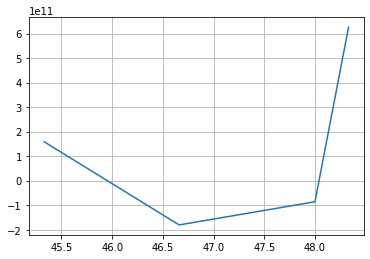

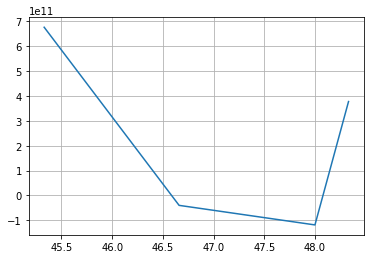

In [56]:
import matplotlib.pyplot as plt

plt.plot(qname,np.array(income_statement_pd.loc["영업이익"]).astype(np.int64))
plt.grid(True)
plt.figure()
plt.grid(True)
plt.plot(qname, np.array(cash_flow_pd.loc["영업활동으로인한현금흐름"]).astype(np.int64))
plt.show()

In [57]:
np.array(cash_flow_pd.loc["영업활동으로인한현금흐름"]).astype(np.int64)

array([ 676513158000,  -39870245000, -118507430000,  377690582000],
      dtype=int64)

In [58]:
import xlsxwriter
excel_writer = pd.ExcelWriter('./excel_output.xlsx', engine='xlsxwriter')
cash_flow_pd.to_excel(excel_writer, index=True, sheet_name='st')
worksheet = excel_writer.sheets['st']

excel_writer.save()

In [59]:
import requests
url ="https://naver.com"
r = requests.get(url)
print(r)
print(r.request.headers)

<Response [200]>
{'User-Agent': 'python-requests/2.27.1', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}


In [60]:
p1["corp_code"][340:]
# 어림잡아 340
mark = 340
count = 340

In [ ]:
count

In [ ]:
account_nm_balance
# 계정명
account_nm_income

account_nm_cash

len(p1["corp_code"])

In [ ]:

strlist = []

for s in account_nm_balance:
    am_name = s
    am_name = am_name.replace(" ", "")
    am_name = am_name.replace("-", "")
    if am_name.find("(") > -1:
        left = am_name.find("(")
        am_name = am_name[:left]
                            
    am_name = re.sub("[^ ㄱ-ㅣ가-힣]","",am_name)
    strlist.append(am_name)
setList = list(set(strlist))  

In [ ]:
for a in setList:
    print(a)

In [ ]:

incom =[]
cash=[]
balence=[]
txtlist = [incom,cash,balence]
direc = "C:/KhAPI/data/dart/financial_statments/"
file_name = ["현금.txt", "재무상태.txt", "손익.txt"]

for i in range(0, 3):
    with open(direc+file_name[i], 'rt', encoding='utf-8') as f:
        line = f.readline()
        while(line):
            txtlist[i].append(line.replace("\n",""))
            line = f.readline()
    
    

In [65]:
for z in txtlist[0]:
    if z :
        print(z)

NameError: name 'txtlist' is not defined

In [224]:
for z in list(set(cash)):
    print(z)

토지사용권
비유동예수부채
비유동당기손익공정가치측정금융부채
장기차입금및기타비유동채무
반기말
유동상각후원가측정유가증권
법정적립금
저작권특허권기타산업재산권용역운영권
파생금융유동자산
장기상각후원가채무증권
소유주분배예정자산집단관련부채
종속기업공동기업및관계기업투자자산
유동성상각후원가측정유가증권
기타단기부채
소유주분배예정부채집단
매각예정자산집단
매입채무및미지급금
단기보증금
장기파생상품금융부채
매출채권및단기기타채권
비유동금융자산
비유동기타포괄손익공정가치측정지정금융자산
비유동상각후원가측정채무증권
조인트벤처에대한투자자산
비유동만기보유금융자산
퇴직급여부채
확정급여제도의재측정손익
통화선도
매출채권손상차손누계액
장기부채성충당부채
기타유동성충당부채
당기법인세자산
매각예정처분자본
기타포괄손익공정가치지분증권
부산물
유동파생상품부채
저작권
매매목적파생상품자산
장기차입금및사채
전환상환우선주부채
보증금
매각예정비유동자산및집단
장기예금
기타포괄공정가치금융자산
장기성기타채무
퇴직급여충당부채
미청구공사채권
수입보증금
비유동확정계약부채
기타장기금융상품
기타포괄손익공정가치지분상품
공동기업및관계기업투자주식
유동기타부채
예수보증금
손실충당금
단기투자자산
반품추정자산
유동성매도청구권부채
유동성장기차입부채
비유동금융보증부채
투자토지
유동리스부채
미착재고자산
매각예정처분집단의자산
매각예정비유동자산관련부채
차입금및유동성사채
기타유형자산감가상각누계액
단기기타금융부채
기타비유동비금융부채
감자차익
지배지분
공사및분양선수금
종속기업공동기업과관계기업에대한투자자산
상표권
공동기업투자
비유동파생상품평가부채
관계기업등투자
장기매출채권
기타의자본조정
단기만기보유금융자산
유동단기매매금융자산
기타무형자산손상차손누계액
유동성금융자산
자본잉여금및기타
제품보증충당부채
기타의유형자산
지배기업소유지본
유동금융파생상품
유동성채무상품
자본잉금
파생상품
기타포괄손익공정가치측정지분증권
배출권자산
비유동성이연법인세자산
단기매출채
장기투자예치금
종속기업및공동기업투자
유동성관계기업투자주식
단기미지급금및기타채무
공동지배기업투자자산
단기투자예치금
장기법적소

In [227]:
for z in list(set(balence)):
    print(z)

법인세이익
계속사업보통주희석주당이익
공사매출
보통주기본주당분기순이익
금융상품대손상각비
영업손실
구형우선주기본및희석주당손익
중단사업손실의귀속
회의비
무형자산폐기손실
대손충당금
기본주당이익
기본및희석보통주당손익
보통주희석주당기순이익
투자손익
비지배지분에귀속될당기순이익
반기계속영업순이익
계속영업반기순이익
금융이익
매출총이익
계속법인세비용차감전순이익
지배기업귀속
지배기업소유주지분순이익
기타영업외비용
계속영업기본주당순손익
상각후원가측정이자수익
관계기업및공동기업투자처분이익
관계기업으로부터의기타수익
중단영업보통주반기기본및희석주당이익
보통주기본주당계속영업이익
기타매출원가
구형우선주희석주당계속영업이익
관계기업및공동기업에대한지분법손익
파생상품평가손실
지배기업의소유주귀속반기순손실
기본및희석주당순이익
외환차익
중단영업희석주당순이익
구형우선주기본주당중단영업이익
중단영업연결손익
지배기업의소유주지분
계속영업이익
분양원가
파생상품거래이익
소모품비
중단영업기본및희석주당손실
비지배지분에귀속되는당기순이익
계속영업희석주당손익
법인세비용차감전계속영업이익
구형우선주희석주당이익
희석주당이익
지배기업소유주
우선주기본주당기순이익
수익
보통주기본주당기순이익
중단영업당기순손실
기본및희석주당이익
기본주당손익
계속영업기본주당이익
통화선도평가손실
투자부동산손상차손환입
중단영업기본주당손실
공사원가
당기손익공정가치금융자산처분이익
우선주분기희석주당이익
계속사업분기순이익
당기손익공정가치금융자산평가이익
연결분기
당기연결순이익
비지배지분반기순이익
당기손익공정가치측정금융자산평가이익
지배기업소유지분
지배기업의소유주에귀속될중단영업당기순이익
보통주희석주당계속영업이익
지배기업의소유주귀속당기순손실
임대수익
지배기업구형우선주중단영업기본및희석주당이익
관계기업의당기순손익에대한지분증가
중단영업당기순이익
계속영업기본및희석주당순손실
지배지분
중단영업기본주당순손실
계속영업법인세비용
공동기업및관계기업투자지분법손익
당기손익인식금융자산처분이익
종속기업및관계기업투자주식처분이익
재화의판매로인한수익
관계기업투자자산손상차손
계속사업손실의귀속
지배기업보통주소유

In [276]:
a = balence
a

['법인세이익',
 '계속사업보통주희석주당이익',
 '우선주기본주당순손실',
 '보통주기본주당분기순손실',
 '지배기업지분',
 '공사매출',
 '기타영업이익',
 '보통주기본주당분기순이익',
 '지배기업소유주지분당기순이익',
 '계속영업순이익',
 '공사수입금',
 '지배기업순이익',
 '계속사업기본주당이익',
 '당기손익인식지정금융자산평가손실',
 '법인세비용',
 '계속당기순이익',
 '우선주희석주당기순이익',
 '관계기업및공동지배기업',
 '공사수익',
 '지분법이익',
 '영업손실',
 '연결중단영업순이익',
 '임가공수입',
 '중단사업손실의귀속',
 '보통주희석주당분기순손실',
 '분기순손익',
 '관계기업및공동지배기업투자이익',
 '보통주기본주당반기순이익',
 '기본주당이익',
 '기본및희석보통주당손익',
 '보통주희석주당기순이익',
 '투자손익',
 '비지배지분소유주지분',
 '법인세비용차감전계속사업순이익',
 '반기계속영업순이익',
 '우선주희석주당반기순손실',
 '관계기업투자지분법손익',
 '종속관계기업투자손익',
 '계속영업반기순이익',
 '금융이익',
 '매출총이익',
 '계속법인세비용차감전순이익',
 '지배기업의소유주귀속당기순이익',
 '연결계속영업순이익',
 '계속영업기본주당순이익',
 '관계기업및공동지배기업투자손실',
 '당기손익공정가치측정금융자산평가손실',
 '보통주희석주당반기순손실',
 '종속기업투자손익',
 '계속영업과중단영업기본및희석주당순이익',
 '지배기업지분순이익',
 '보통주기본및희석주당이익',
 '공동기업및관계기업투자손익',
 '중단당기순이익',
 '기본주당분기순이익',
 '중단영업분기순이익',
 '보통주희석주당분기순이익',
 '공동지배기업투자이익손익',
 '지배기업소유주지분순이익',
 '중단영업기본주당순손익',
 '기타영업외비용',
 '계속영업기본주당순손익',
 '계속법인세비용',
 '지배기업소유주지분',
 '중단영업반기순이익',
 '금융수익',
 '공동기업등투자손익',
 '관계기업으로부터의기타수익',
 '비지배주주

In [281]:
for x in a:
    a.remove(x)
    while(x in a):
        a.remove(x)
    if x not in a:    
        a.append(x)
    

In [282]:
a

['하역매출원가',
 '연결총포괄손익',
 '보통주기본주당준단영업이익',
 '비지배주주지분순이익',
 '분배예정자산처분이익',
 '도서및교육훈련비',
 '연결총포괄손익의귀속',
 '지배기업보통주소유주주당이익',
 '기타대손충당금환입',
 '계속영업기본및희석주당이익',
 '기본주당분기순이익',
 '금융비용',
 '기본및희석주당순손실',
 '보통주희석주당이익',
 '관계기업및공동지배기업투자이익손익',
 '우선주기본주당분기순손실',
 '통화선도평가이익',
 '지배기업구형우선주중단영업기본및희석주당이익',
 '희석주당손익',
 '계속영업기본주당순이익',
 '재화의판매로인한수익',
 '중단영업분기순이익',
 '기타엽업외비용',
 '손상차손',
 '기본우선주당손익',
 '지배기업구형우선주계속영업기본및희석주당이익',
 '지배기업의소유주에게귀속되는당기순이익',
 '비지배지분소유주지분',
 '건설형계약매출',
 '우선주희석주당분기순이익',
 '지분법적용투자손실',
 '지배기업소유지분',
 '기본및희석주당손익',
 '연결기타포괄손익',
 '연결반기순이익',
 '제세공과금',
 '지배기업소유주지분순이익',
 '지분법손익',
 '기타매출',
 '보통주반기기본및희석주당이익',
 '중단영업기본주당손익',
 '비지배지분순손익',
 '구형우선주희석주당계속영업이익',
 '당기손익인식금융자산처분이익',
 '당',
 '보통주기본및희석주당손익',
 '희석주당순이익',
 '관계기업및종속기업관련손익',
 '계속영업보통주분기기본및희석주당이익',
 '공동기업등투자손익',
 '공사원가',
 '계속영업희석주당이익',
 '법인세비용차감전계속영업이익',
 '관계회사및공동지배기업투자이익',
 '지배기업의소유주귀속분기순이익',
 '지배기업구형우선주기본및희석주당이익',
 '보통주희석주당반기순이익',
 '외환차손',
 '관계기업투자이익에대한지분',
 '계속영업당기순이익',
 '지배기업의소유주에게귀속되는당기순손실',
 '우선주당기기본주당이익',
 '계속영업순이익',
 '임가공원가',
 '보험료',
 '관계기업투자자산처분

In [86]:
a= [{"name" : 1,"q": "abc"},{"name" : 5,"q": "cba"}]

pd.DataFrame(a)

,name,q
0,1,abc
1,5,cba


In [110]:
a =1234
f'{a:08d}'

'00001234'

In [112]:
a = ["asdf","qwer"]
a.remove("asdf")
a

['qwer']